In [67]:
import sympy as sym
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [68]:
def formato_grafica(titulo, ejex, ejey, leyenda=False, xlim=[None, None], ylim=[None, None]):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)

    if leyenda == True:
        plt.legend(loc='best')

    plt.tight_layout;

# Parte 1

# ÍTEM 1

Punto 1

In [69]:
Loss_dt, g, W, G, C_rr, AC_d, rho, V_gs, V_hw = sym.symbols("Loss_dt, g, W, G, C_rr, AC_d, rho, V_gs, V_hw")

In [70]:
P_legs = (1-Loss_dt/100)**(-1)*( g*W*sym.sin(sym.atan(G/100))+g*W*sym.cos(sym.atan(G/100))*C_rr + 0.5*AC_d*rho*(V_gs+V_hw)**2)*V_gs
P_legs

V_gs*(0.5*AC_d*rho*(V_gs + V_hw)**2 + C_rr*W*g/sqrt(G**2/10000 + 1) + G*W*g/(100*sqrt(G**2/10000 + 1)))/(1 - Loss_dt/100)

In [44]:
poly_form_almost = P_legs.expand(V_gs)
poly_form_almost

0.5*AC_d*V_gs**3*rho/(1 - Loss_dt/100) + 1.0*AC_d*V_gs**2*V_hw*rho/(1 - Loss_dt/100) + 0.5*AC_d*V_gs*V_hw**2*rho/(1 - Loss_dt/100) + C_rr*V_gs*W*g/(-Loss_dt*sqrt(G**2/10000 + 1)/100 + sqrt(G**2/10000 + 1)) + G*V_gs*W*g/(-Loss_dt*sqrt(G**2/10000 + 1) + 100*sqrt(G**2/10000 + 1))

In [45]:
poly_form = 0.5*AC_d*V_gs**3*rho/(1 - Loss_dt/100) + AC_d*V_gs**2*V_hw*rho/(1 - Loss_dt/100) + (0.5*AC_d*V_hw**2*rho/(1 - Loss_dt/100) + C_rr*W*g/(-Loss_dt*sym.sqrt(G**2/10000 + 1)/100 + sym.sqrt(G**2/10000 + 1)) + G*W*g/(-Loss_dt*sym.sqrt(G**2/10000 + 1) + 100*sym.sqrt(G**2/10000 + 1)))*V_gs
poly_form

0.5*AC_d*V_gs**3*rho/(1 - Loss_dt/100) + AC_d*V_gs**2*V_hw*rho/(1 - Loss_dt/100) + V_gs*(0.5*AC_d*V_hw**2*rho/(1 - Loss_dt/100) + C_rr*W*g/(-Loss_dt*sqrt(G**2/10000 + 1)/100 + sqrt(G**2/10000 + 1)) + G*W*g/(-Loss_dt*sqrt(G**2/10000 + 1) + 100*sqrt(G**2/10000 + 1)))

Punto 2

In [46]:
Pleggs = poly_form.subs([[C_rr,0.005],[V_hw,0],[AC_d,0.35],[Loss_dt,2],[rho,1.225],[W,83.5],[g,9.77]])
Pleggs

0.21875*V_gs**3 + V_gs*(8.3244387755102*G/sqrt(G**2/10000 + 1) + 4.1622193877551/sqrt(G**2/10000 + 1))

In [47]:
puertos = pd.read_excel("data\puertos.xlsx")
primera_grafica = puertos.loc[puertos["Primera gráfica\nÚltimo dígito 1er estudiante"]==1].reset_index()
segunda_grafica = puertos.loc[puertos["Segunda gráfica\nÚltimo dígito 2do estudiante"]==9].reset_index()

In [48]:
x,t =sym.symbols("x,t")

pendiente_1 = primera_grafica["Pendiente promedio [%]"][0]
distancia_1 = primera_grafica["Distancia [km]"][0]*1000
tiempo_1 = primera_grafica["Mejor tiempo registrado en Strava [min]"][0]*60

pendiente_2 = segunda_grafica["Pendiente promedio [%]"][0]
distancia_2 = segunda_grafica["Distancia [km]"][0]*1000
tiempo_2 = segunda_grafica["Mejor tiempo registrado en Strava [min]"][0]*60


Pleggs1 = Pleggs.subs([[G,pendiente_1],[V_gs,x/t]])
Pleggs1 = Pleggs1.subs(x,distancia_1)

Pleggs2 = Pleggs.subs([[G,pendiente_2],[V_gs,x/t]])
Pleggs2 = Pleggs2.subs(x,distancia_2)


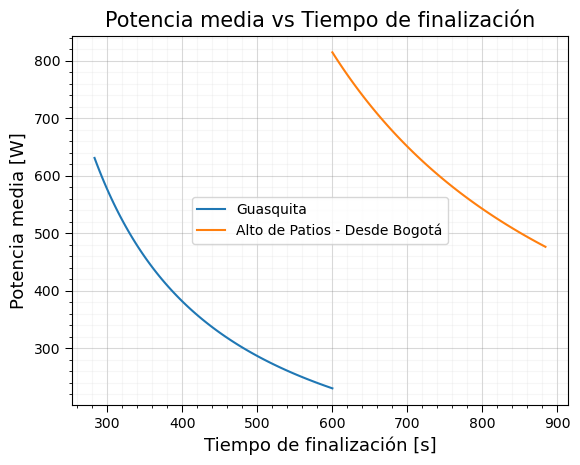

In [49]:
tiempos1 = np.linspace(tiempo_1,600,100)
tiempos2 = np.linspace(tiempo_2,600,100)

P_leggs1 = sym.lambdify(t,Pleggs1)
P_leggs2 = sym.lambdify(t,Pleggs2)

plt.plot(tiempos1,P_leggs1(tiempos1),label="{0}".format(primera_grafica["Nombre del puerto"][0]))
plt.plot(tiempos2,P_leggs2(tiempos2),label="{0}".format(segunda_grafica["Nombre del puerto"][0]))
plt.legend()
formato_grafica("Potencia media vs Tiempo de finalización","Tiempo de finalización [s]","Potencia media [W]")

Punto 3

In [50]:
tiempo_237W_primera_grafica = sym.solve(sym.Eq(Pleggs1,237),t)[0]
tiempo_237W_segunda_grafica = sym.solve(sym.Eq(Pleggs2,237),t)[0]

In [51]:
tiempo_237W_primera_grafica, tiempo_237W_segunda_grafica # Para el caso de Guasquita y Alto de Patios

(585.144736507678, 1606.31975226055)

Punto 4

In [52]:
Pleggs_new1_primera_grafica = poly_form.subs([[C_rr,0.005],[V_hw,0],[AC_d,0.35],[Loss_dt,2],
                                              [rho,1.225],[W,82.5],[g,9.77],[V_gs,x/t],[G,pendiente_1]])
Pleggs_new1_primera_grafica = Pleggs_new1_primera_grafica.subs(x,distancia_1)


Pleggs_new2_primera_grafica = poly_form.subs([[C_rr,0.005],[V_hw,0],[AC_d,0.35],[Loss_dt,2],
                                              [rho,1.225],[W,78.5],[g,9.77],[V_gs,x/t],[G,pendiente_1]])
Pleggs_new2_primera_grafica = Pleggs_new2_primera_grafica.subs(x,distancia_1)

In [53]:
tiempo1_237W_primera_grafica = sym.solve(sym.Eq(Pleggs_new1_primera_grafica,237),t)[0]
tiempo2_237W_primera_grafica = sym.solve(sym.Eq(Pleggs_new2_primera_grafica,237),t)[0]

tiempo_ganado1_primera_grafica = tiempo_237W_primera_grafica - tiempo1_237W_primera_grafica
tiempo_ganado2_primera_grafica = tiempo_237W_primera_grafica - tiempo2_237W_primera_grafica

tiempo_ganado1_primera_grafica, tiempo_ganado2_primera_grafica # Para el caso de Guasquita, con 1 kg y 5 kg menos

(5.42788426299228, 26.9016607567862)

In [54]:
Pleggs_new1_segunda_grafica = poly_form.subs([[C_rr,0.005],[V_hw,0],[AC_d,0.35],[Loss_dt,2],
                                              [rho,1.225],[W,82.5],[g,9.77],[V_gs,x/t],[G,pendiente_2]])
Pleggs_new1_segunda_grafica = Pleggs_new1_segunda_grafica.subs(x,distancia_2)


Pleggs_new2_segunda_grafica = poly_form.subs([[C_rr,0.005],[V_hw,0],[AC_d,0.35],[Loss_dt,2],
                                              [rho,1.225],[W,78.5],[g,9.77],[V_gs,x/t],[G,pendiente_2]])
Pleggs_new2_segunda_grafica = Pleggs_new2_segunda_grafica.subs(x,distancia_2)

In [55]:
tiempo1_237W_segunda_grafica = sym.solve(sym.Eq(Pleggs_new1_segunda_grafica,237),t)[0]
tiempo2_237W_segunda_grafica = sym.solve(sym.Eq(Pleggs_new2_segunda_grafica,237),t)[0]

tiempo_ganado1_segunda_grafica = tiempo_237W_segunda_grafica - tiempo1_237W_segunda_grafica
tiempo_ganado2_segunda_grafica = tiempo_237W_segunda_grafica - tiempo2_237W_segunda_grafica

tiempo_ganado1_segunda_grafica, tiempo_ganado2_segunda_grafica # Para el caso de Alto de Patios, 1 kg y 5 kg menos

(16.7852969719399, 83.4507131552232)

Punto 5

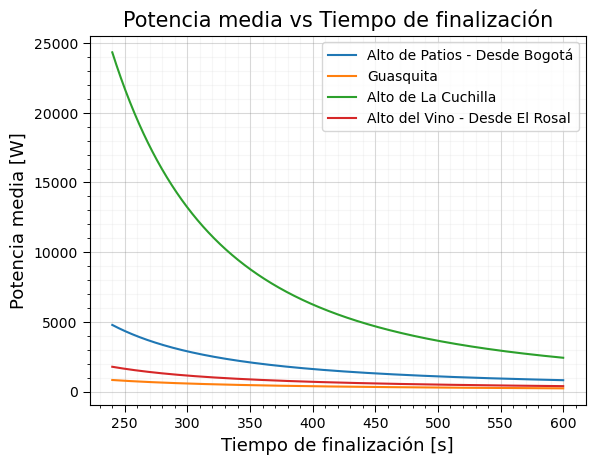

In [56]:
for i in range(4):
    conjunto = puertos.loc[puertos["Primera gráfica\nÚltimo dígito 1er estudiante"]==i].reset_index()

    pendiente = conjunto["Pendiente promedio [%]"][0]
    distancia = conjunto["Distancia [km]"][0]*1000
    tiempo = conjunto["Mejor tiempo registrado en Strava [min]"][0]*60

    tiempos_grafica = np.linspace(240,600,1000)

    Pleggs_ = Pleggs.subs([[G,pendiente],[V_gs,x/t]])
    Pleggs_ = Pleggs_.subs(x,distancia)

    func_save = sym.lambdify(t,Pleggs_)

    plt.plot(tiempos_grafica,func_save(tiempos_grafica),label="{0}".format(conjunto["Nombre del puerto"][0]))

plt.legend()
formato_grafica("Potencia media vs Tiempo de finalización","Tiempo de finalización [s]","Potencia media [W]")
    

Con el puerto de Guasquita se puede decir que es el que requiere menos esfuerzo con respecto a los demás porque se requiere menos potencia para un tiempo de finalización menor. En el caso del puerto de Alto de Patios-Desde Bogotá, requiere más esfuerzo que Guasquita, pero no tanto como otros como Alto de La Chuchilla y los demás que no fueron graficados porque requerían de potencias mucho más grandes, por lo que no se veía bien la gráfica.

# ÍTEM 2

In [57]:
DataFrame2 = pd.read_excel("data/data.xlsx")

Punto 1

In [58]:
Cadence_cut = DataFrame2[(DataFrame2[" cadence [rpm]"]<90)&(DataFrame2[" cadence [rpm]"]>70)]
heartrate_mean = Cadence_cut[" heartrate [bpm]"].mean()
heartrate_mean

177.59649122807016

Punto 2

Para esto, se usaron intervalos semiabiertos con el fin de que la distribución de porcentajes dieran un total del 100%

In [59]:
zona1_filas = DataFrame2[(DataFrame2[" watts [W]"]<=130)&(DataFrame2[" watts [W]"]>=0)].shape[0]
zona1_porcentaje = 100 * zona1_filas/DataFrame2.shape[0]

zona2_filas = DataFrame2[(DataFrame2[" watts [W]"]<=178)&(DataFrame2[" watts [W]"]>130)].shape[0]
zona2_porcentaje = 100 * zona2_filas/DataFrame2.shape[0]

zona3_filas = DataFrame2[(DataFrame2[" watts [W]"]<=213)&(DataFrame2[" watts [W]"]>178)].shape[0]
zona3_porcentaje = 100 * zona3_filas/DataFrame2.shape[0]

zona4_filas = DataFrame2[(DataFrame2[" watts [W]"]<=249)&(DataFrame2[" watts [W]"]>213)].shape[0]
zona4_porcentaje = 100 * zona4_filas/DataFrame2.shape[0]

zona5_filas = DataFrame2[(DataFrame2[" watts [W]"]<=284)&(DataFrame2[" watts [W]"]>249)].shape[0]
zona5_porcentaje = 100 * zona5_filas/DataFrame2.shape[0]

zona6_filas = DataFrame2[(DataFrame2[" watts [W]"]<=356)&(DataFrame2[" watts [W]"]>284)].shape[0]
zona6_porcentaje = 100 * zona6_filas/DataFrame2.shape[0]

zona7_filas = DataFrame2[(DataFrame2[" watts [W]"]<=1500)&(DataFrame2[" watts [W]"]>356)].shape[0]
zona7_porcentaje = 100 * zona7_filas/DataFrame2.shape[0]

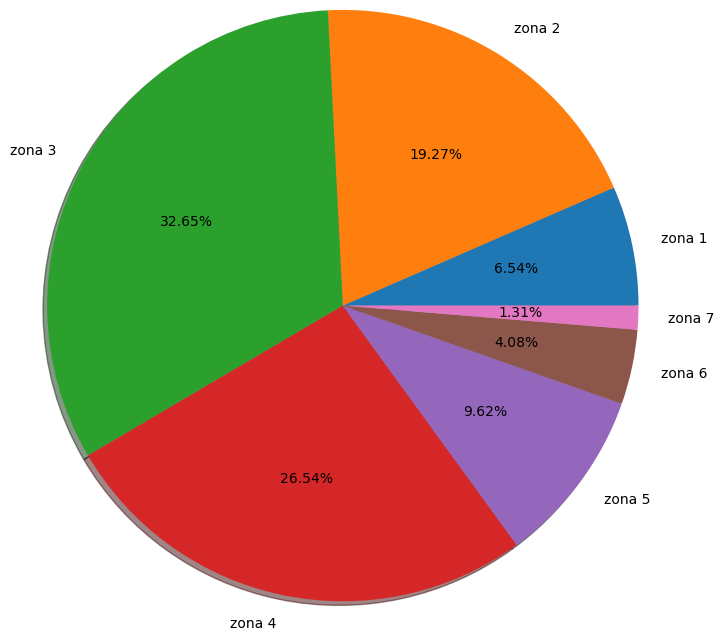

In [60]:
porcentajes = np.array([zona1_porcentaje, zona2_porcentaje, zona3_porcentaje, 
                        zona4_porcentaje, zona5_porcentaje, zona6_porcentaje, 
                        zona7_porcentaje])

labels = "zona 1", "zona 2", "zona 3", "zona 4", "zona 5", "zona 6", "zona 7"
plt.pie(porcentajes,autopct='%1.2f%%',labels=labels,radius=2,shadow=True)
plt.show()

Para representar los datos, se eligió un diagrama de torta porque es uno de los mejores gráficos para mostrar porcentajes de forma simple

# ÍTEM 3

Punto 1 y Punto 2

In [61]:
DataFrame3 = pd.read_csv("data/curva-potencia.csv",sep=";")

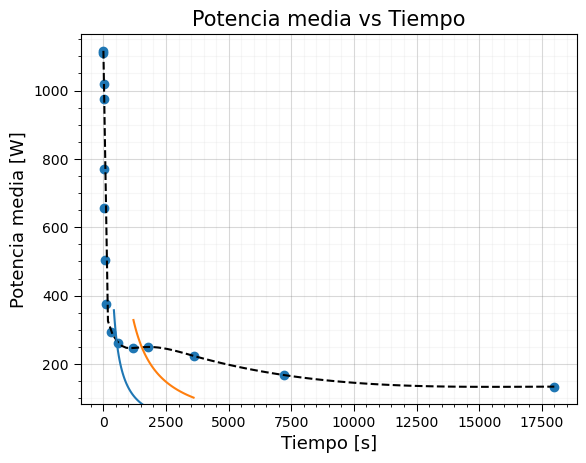

In [62]:
p_media = np.array(DataFrame3["Power [W]"])
time = np.array(DataFrame3["Time [s]"])

spline = scipy.interpolate.CubicSpline(time,p_media)

x_new = np.linspace(time[0],time[-1],100)
y_new = spline(x_new)

plt.scatter(time,p_media)
plt.plot(x_new,y_new,color="black",linestyle="--")
formato_grafica("Potencia media vs Tiempo","Tiempo [s]","Potencia media [W]")

tiempos1_new = np.linspace(420,3600,100)
tiempos2_new = np.linspace(1200,3600,100)

plt.plot(tiempos1_new,P_leggs1(tiempos1_new),label="{0}".format(primera_grafica["Nombre del puerto"][0]))
plt.plot(tiempos2_new,P_leggs2(tiempos2_new),label="{0}".format(primera_grafica["Nombre del puerto"][0]))

Gráfica bonita 

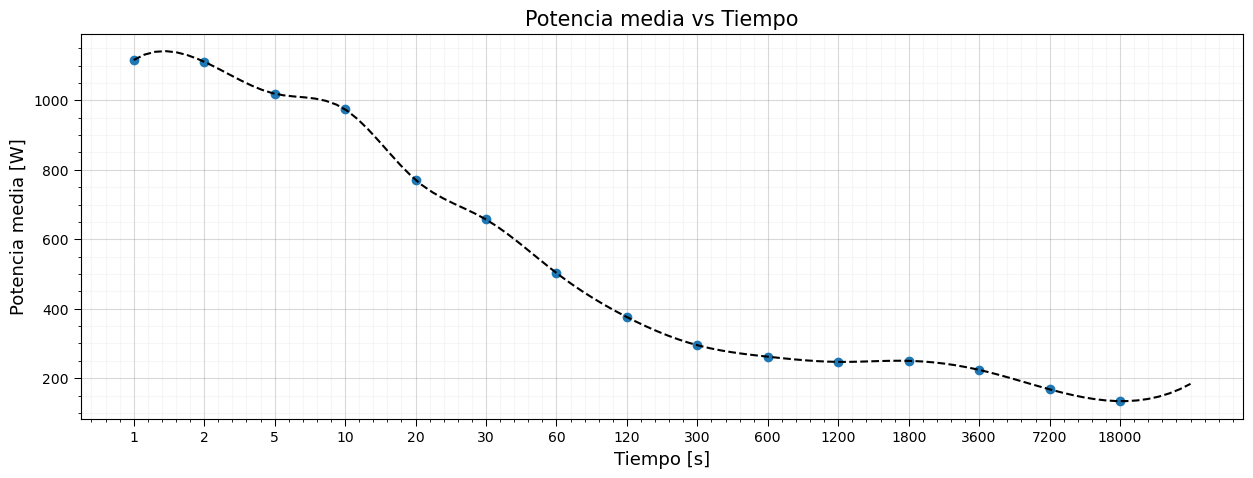

In [71]:
figure, ax = plt.subplots(figsize=(15,5))

p_media = np.array(DataFrame3["Power [W]"])
time = np.array(DataFrame3["Time [s]"])

itp_spline = scipy.interpolate.CubicSpline(range(len(p_media)), p_media)

x_new = np.linspace(0,len(p_media),100)
y_new = itp_spline(x_new)

plt.scatter(range(len(p_media)),p_media)
plt.plot(x_new,y_new,color="black",linestyle="--")

valores_primera_grafica = P_leggs1(tiempos1_new)

plt.xticks(range(len(p_media)),time)
formato_grafica("Potencia media vs Tiempo","Tiempo [s]","Potencia media [W]")


plt.show()

In [63]:
Pleggs1

126518.695923546/t + 4163723156.25/t**3

In [84]:
def Pleggs1_scipy(t):
    return 126518.695923546/t + 4163723156.25/t**3

spline = scipy.interpolate.CubicSpline(time, p_media)

def diff_function1(t):
    return Pleggs1_scipy(t) - spline(t)

punto_de_corte1 = scipy.optimize.root_scalar(diff_function1, bracket=[100,2000],method="bisect")
punto_de_corte1.root, punto_de_corte1.root/60  # El primero en segundos, y luego en minutos

(526.607245294814, 8.776787421580233)

In [65]:
Pleggs2

363197.440538543/t + 45155484281.25/t**3

In [85]:
def Pleggs2_scipy(t):
    return 363197.440538543/t + 45155484281.25/t**3

spline = scipy.interpolate.CubicSpline(time, p_media)

def diff_function2(t):
    return Pleggs2_scipy(t) - spline(t)

punto_de_corte2 = scipy.optimize.root_scalar(diff_function2, bracket=[1000,2500], method="bisect")
punto_de_corte2.root, punto_de_corte2.root/60 
#El primero en segundos, y luego en minutos

(1535.1949704853682, 25.586582841422803)

# Parte 2

# ÍTEM 1

Punto 3

In [87]:
def ode(variables,V,L,C,Q,R,t):
    # Variables
    Q = variables[0]
    dQ_dt = variables[1]
    
    # Ecuaciones
    d2Q_dt2 = V/L - (1/(C*L))*Q - (R/L)*dQ_dt
    
    return [dQ_dt, d2x_dt2]